In [1]:
!pip install gym[atari] numpy matplotlib torch


INFO: pip is looking at multiple versions of gym[atari] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 8.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00

In [3]:
!pip install "gym[accept-rom-license,atari]"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for AutoROM.accept-rom-license: filename=autorom_accept_rom_license-0.6.1-py3-none-any.whl size=446711 sha256=35bac3871ffd6dec64e01931c4e5165d009ac29e1b0d6ea0f691fc1a8f4d8c4e
  Stored in directory: /root/.cache/pip/wheels/bc/fc/c6/8aa657c0d2089982f2dabd110efc68c61eb49831fdb7397351
Successfully built AutoROM.accept-rom-license


In [7]:
!pip install numpy==1.24.4


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 81.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is 

Using device: cpu

🚀 Starting Training...
[Episode 1 | Step 100] Training on batch... Buffer size: 100
[Episode 1 | Step 200] Training on batch... Buffer size: 200
[Episode 1 | Step 300] Training on batch... Buffer size: 300
[Episode 1 | Step 400] Training on batch... Buffer size: 400
[Episode 1 | Step 500] Training on batch... Buffer size: 500
[Episode 1 | Step 600] Training on batch... Buffer size: 600
[Episode 1 | Step 700] Training on batch... Buffer size: 700
[Episode 1 | Step 800] Training on batch... Buffer size: 800
[Episode 1 | Step 900] Training on batch... Buffer size: 900
[Episode 1 | Step 1000] Training on batch... Buffer size: 1000
[Episode 1 | Step 1100] Training on batch... Buffer size: 1100
[Episode 1 | Step 1200] Training on batch... Buffer size: 1200
[Episode 1 | Step 1300] Training on batch... Buffer size: 1300
[Episode 1 | Step 1400] Training on batch... Buffer size: 1400
[Episode 1 | Step 1500] Training on batch... Buffer size: 1500
[Episode 1 | Step 1600] Trainin

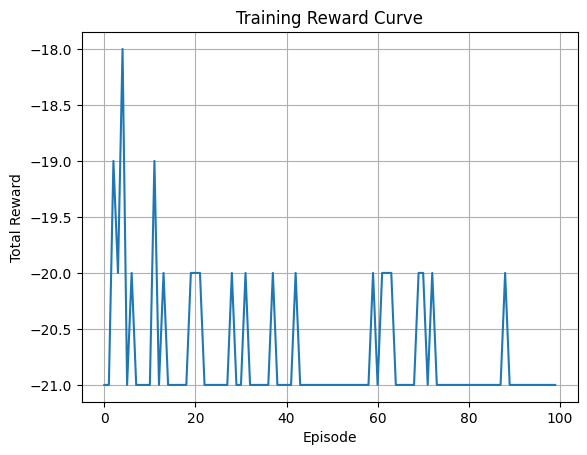

In [5]:
import gym
import numpy as np
import random
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import cv2
from collections import deque
import os

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Preprocessing function (optional if using wrappers)
def preprocess_frame(frame):
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    frame = cv2.resize(frame, (84, 84))
    return frame

# DQN Model
class DQN(nn.Module):
    def __init__(self, n_actions):
        super(DQN, self).__init__()
        self.conv1 = nn.Conv2d(4, 32, kernel_size=8, stride=4)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1)
        self.fc1 = nn.Linear(7 * 7 * 64, 512)
        self.fc2 = nn.Linear(512, n_actions)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.relu(self.conv3(x))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Replay Buffer
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, experience):
        self.buffer.append(experience)

    def sample(self, batch_size):
        return random.sample(self.buffer, batch_size)

    def size(self):
        return len(self.buffer)

# DQN Training
def train_dqn(model, env, optimizer, n_episodes=100, batch_size=32, gamma=0.99, epsilon_decay=0.995, epsilon_min=0.1):
    replay_buffer = ReplayBuffer(10000)
    epsilon = 1.0
    total_rewards = []

    for episode in range(n_episodes):
        obs = env.reset()
        if isinstance(obs, tuple):
            obs = obs[0]
        frame = preprocess_frame(obs)
        state = np.stack([frame] * 4, axis=0)
        total_reward = 0
        steps = 0

        while True:
            steps += 1
            epsilon = max(epsilon_min, epsilon * epsilon_decay)

            if random.random() < epsilon:
                action = env.action_space.sample()
            else:
                with torch.no_grad():
                    q_values = model(torch.tensor(state).unsqueeze(0).float().to(device))
                    action = torch.argmax(q_values).item()

            next_obs, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            next_frame = preprocess_frame(next_obs)
            next_state = np.append(state[1:], np.expand_dims(next_frame, axis=0), axis=0)
            total_reward += reward

            replay_buffer.push((state, action, reward, next_state, done))

            # Training step
            if replay_buffer.size() >= batch_size and steps % 100 == 0:
                print(f"[Episode {episode+1} | Step {steps}] Training on batch... Buffer size: {replay_buffer.size()}")
                batch = replay_buffer.sample(batch_size)
                states, actions, rewards, next_states, dones = zip(*batch)

                states = torch.tensor(np.array(states)).float().to(device)
                next_states = torch.tensor(np.array(next_states)).float().to(device)
                rewards = torch.tensor(np.array(rewards)).float().to(device)
                dones = torch.tensor(np.array(dones)).float().to(device)
                actions = torch.tensor(np.array(actions)).long().to(device)

                q_values = model(states)
                next_q_values = model(next_states)
                target_q_values = rewards + gamma * next_q_values.max(1)[0] * (1 - dones)

                loss = nn.functional.mse_loss(q_values.gather(1, actions.unsqueeze(1)), target_q_values.unsqueeze(1))
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            state = next_state
            if done:
                print(f"Episode {episode+1} finished after {steps} steps | Reward: {total_reward:.2f}")
                break

        total_rewards.append(total_reward)

        if (episode + 1) % 100 == 0:
            torch.save(model.state_dict(), f"dqn_pong_episode_{episode+1}.pth")
            print(f"✅ Model saved at episode {episode+1}")

    return total_rewards

# Evaluation
def evaluate(model, env, n_episodes=5):
    model.eval()
    total_rewards = []
    for episode in range(n_episodes):
        obs = env.reset()
        if isinstance(obs, tuple):
            obs = obs[0]
        frame = preprocess_frame(obs)
        state = np.stack([frame] * 4, axis=0)
        total_reward = 0

        while True:
            with torch.no_grad():
                q_values = model(torch.tensor(state).unsqueeze(0).float().to(device))
                action = torch.argmax(q_values).item()

            next_obs, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

            next_frame = preprocess_frame(next_obs)
            state = np.append(state[1:], np.expand_dims(next_frame, axis=0), axis=0)
            total_reward += reward

            if done:
                print(f"Evaluation Episode {episode+1}: Reward = {total_reward}")
                break

        total_rewards.append(total_reward)

    print(f"🏁 Average reward over {n_episodes} episodes: {np.mean(total_rewards):.2f}")

# Create and wrap environment
env = gym.make("PongNoFrameskip-v4", render_mode=None)

n_actions = env.action_space.n
model = DQN(n_actions).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Train
print("\n🚀 Starting Training...")
rewards = train_dqn(model, env, optimizer, n_episodes=100)

# Evaluate
print("\n🧪 Evaluating Agent...")
evaluate(model, env, n_episodes=5)

# Plot
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Training Reward Curve')
plt.grid()
plt.show()

env.close()
